\title{\textbf{\fontsize{24pt}{30pt} Projekt zaliczeniowy \break \break  Uczenie maszynowe i sztuczna inteligencja w finansach \break}}  
\vspace{50pt}  
\author{Alan Śliwiński \\ 89575 \and name2 \\ album2 \and imie \\ album3}  
\date{28 stycznia 2024}  
\maketitle

\vspace{100pt}
\large{\textbf moj text}
\vspace{200pt}  
\renewcommand{\contentsname}{Spis treści}

\tableofcontents

\pagebreak

# Biblioteki i dane

notatka

In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

notatka

In [2]:
usecols = [
        "TYTUŁ",
        "ROK_PRODUKCJI",
        "PRZEBIEG_KM",
        "POJEMNOŚĆ_SILNIKA_CM3",
        "PALIWO",
        "MIASTO",
        "WOJEWODZTWO",
        "CENA",
        "WALUTA",
    ]
df = pd.read_csv(
    "otomoto.csv",
    usecols=usecols
)

notatka

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151360 entries, 0 to 151359
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   TYTUŁ                  151360 non-null  object 
 1   ROK_PRODUKCJI          133434 non-null  float64
 2   PRZEBIEG_KM            133428 non-null  float64
 3   POJEMNOŚĆ_SILNIKA_CM3  151147 non-null  float64
 4   PALIWO                 151360 non-null  object 
 5   MIASTO                 151360 non-null  object 
 6   WOJEWODZTWO            151360 non-null  object 
 7   CENA                   151360 non-null  int64  
 8   WALUTA                 151360 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 10.4+ MB


notatka

# Exploratory data analysis

notatka

## Dane numeryczne

notatka

In [4]:
df.describe().astype(int)

,ROK_PRODUKCJI,PRZEBIEG_KM,POJEMNOŚĆ_SILNIKA_CM3,CENA
count,133434,133428,151147,151360
mean,2012,163780,1937,58182
std,6,92678,836,65131
min,1937,1,480,1250
25%,2009,94296,1469,17900
50%,2012,179010,1798,35800
75%,2017,224000,1997,74999
max,2023,1943000,7990,1966770


notatka

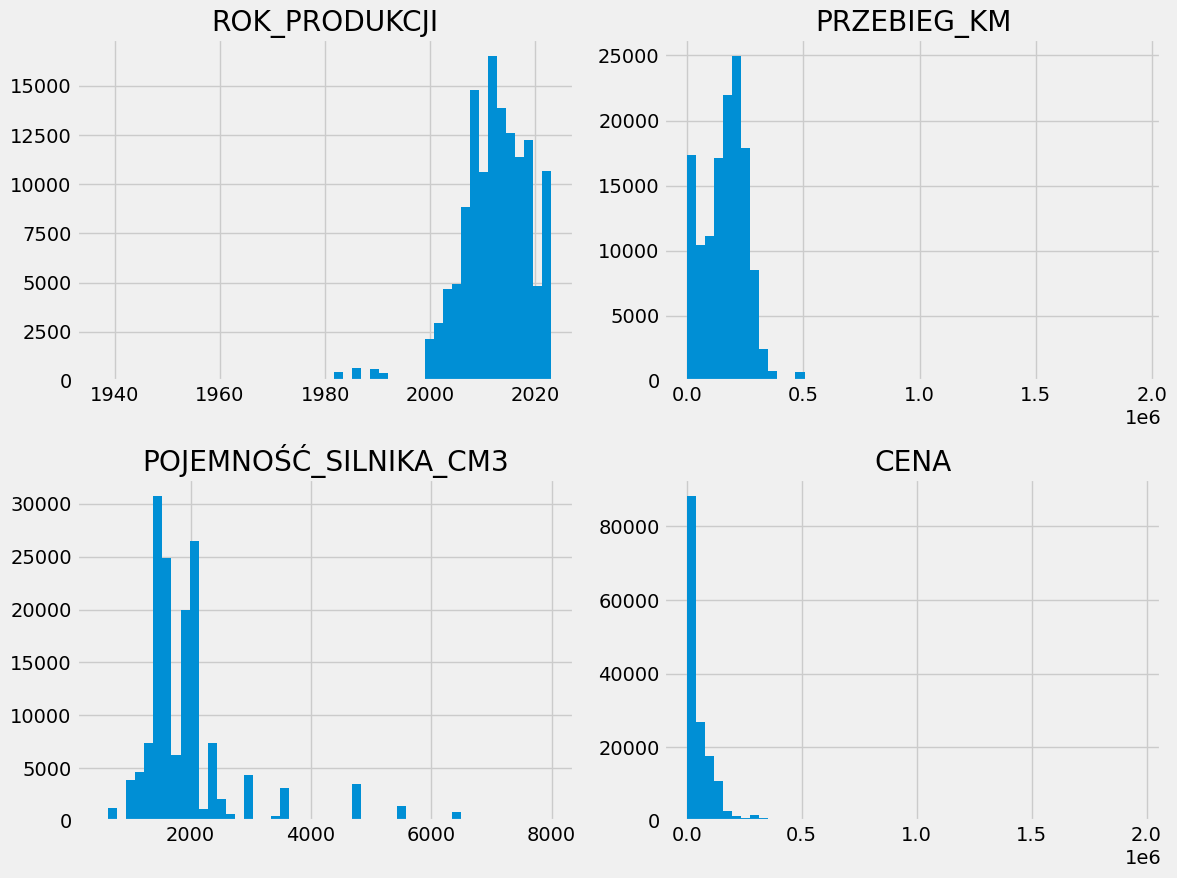

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(12, 9))

for i, stat in enumerate(("ROK_PRODUKCJI", "PRZEBIEG_KM", "POJEMNOŚĆ_SILNIKA_CM3", "CENA")):
    div, mod = divmod(i, 2)

    ax[div, mod].hist(df[stat], bins=50)
    ax[div, mod].set_title(stat)

plt.tight_layout()
plt.show()

notatka

In [6]:
df.corr(numeric_only=True)

,ROK_PRODUKCJI,PRZEBIEG_KM,POJEMNOŚĆ_SILNIKA_CM3,CENA
ROK_PRODUKCJI,1.000000,-0.640153,-0.017929,0.609579
PRZEBIEG_KM,-0.640153,1.000000,0.087712,-0.641472
POJEMNOŚĆ_SILNIKA_CM3,-0.017929,0.087712,1.000000,0.220832
CENA,0.609579,-0.641472,0.220832,1.000000


notatka

## Dane kategoryczne

notatka

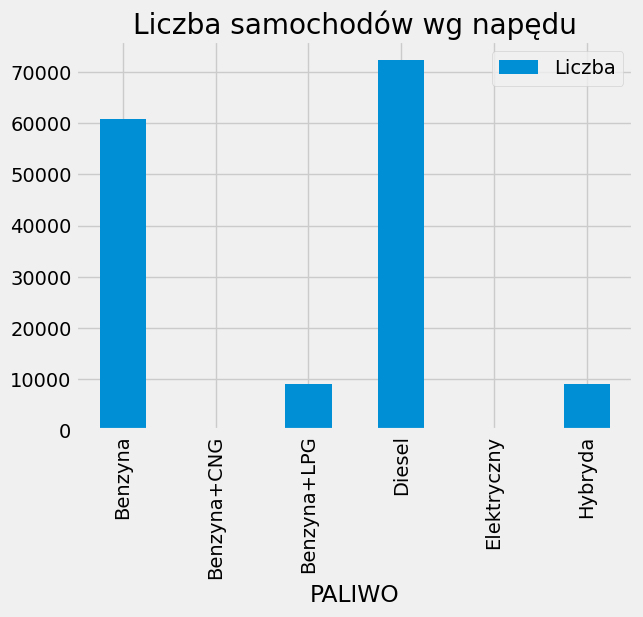

In [31]:
df.groupby('PALIWO')[['CENA']].count().plot.bar()
plt.legend(['Liczba'])
plt.title('Liczba samochodów wg napędu')
plt.show()

notatka

In [8]:
woj_data = df.groupby("WOJEWODZTWO").CENA.describe().round(2).sort_values('count', ascending=False)
woj_data

,count,mean,std,min,25%,50%,75%,max
WOJEWODZTWO,,,,,,,,
Mazowieckie,26654.0,83625.66,68158.87,3000.0,22900.0,70000.0,155890.0,1499999.0
Wielkopolskie,25606.0,44592.12,58033.65,1250.0,9900.0,28900.0,55000.0,1966770.0
Dolnośląskie,19225.0,43793.56,41021.80,1600.0,9750.0,28500.0,87000.0,699999.0
Małopolskie,16085.0,42219.87,48352.35,2000.0,17900.0,26900.0,51900.0,1289000.0
Świętokrzyskie,11331.0,71837.12,30127.82,4400.0,56999.0,74999.0,96500.0,639000.0
Śląskie,11195.0,79787.09,108564.44,2450.0,15990.0,28200.0,85900.0,1080000.0
Lubuskie,7625.0,42991.48,24576.86,2900.0,33500.0,38400.0,64500.0,790000.0
Lubelskie,6853.0,46316.55,36390.37,2800.0,27800.0,36700.0,40000.0,445000.0
Zachodniopomorskie,5938.0,40756.01,36537.07,2699.0,19500.0,27900.0,63900.0,1070425.0


notatka

In [9]:
woj_shp = gpd.read_file("wojewodztwa.zip")[["JPT_NAZWA_", "geometry"]]
woj_shp.JPT_NAZWA_ = woj_shp.JPT_NAZWA_.str.capitalize()

notatka

In [10]:
woj_plot = woj_shp.merge(
        woj_data, how="outer", left_on="JPT_NAZWA_", right_on="WOJEWODZTWO"
    ).dropna().set_index("JPT_NAZWA_")

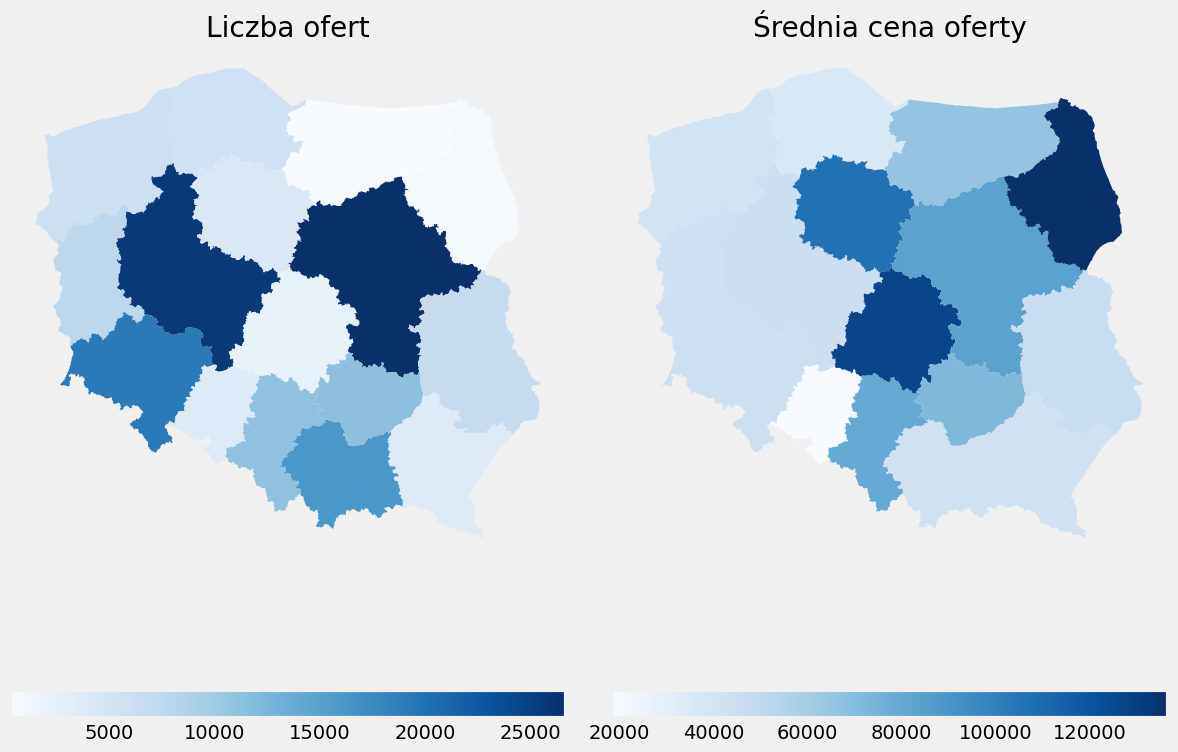

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 9))

ax1 = woj_plot.plot(
    "count",
    ax=ax[0],
    legend=True,
    cmap="Blues",
    legend_kwds={"orientation": "horizontal"},
)
ax1.set_axis_off()
ax1.set_title("Liczba ofert")

ax2 = woj_plot.plot(
    "mean",
    ax=ax[1],
    legend=True,
    cmap="Blues",
    legend_kwds={"orientation": "horizontal"},
)
ax2.set_axis_off()
ax2.set_title("Średnia cena oferty")
plt.tight_layout()
plt.show()

notatka

In [12]:
df.loc[0, 'TYTUŁ']

'Skoda Superb 2.0 Comfort'

notatka

In [13]:
df.insert(1, 'MARKA', df.TYTUŁ.str.split(' ').str[0])

In [14]:
a = df.groupby("MARKA").CENA.describe().round(2).sort_values("count", ascending=False)
a.head(10)

,count,mean,std,min,25%,50%,75%,max
MARKA,,,,,,,,
Ford,16233.0,38579.86,25463.72,2450.0,15990.0,34900.0,55000.0,399000.0
Volkswagen,14344.0,33139.58,33816.69,1850.0,9900.0,21800.0,40000.0,538340.0
Opel,11317.0,19763.93,15144.17,1250.0,9700.0,9900.0,28500.0,191300.0
Toyota,9312.0,28684.19,25234.61,4500.0,16900.0,18900.0,36700.0,740000.0
BMW,9185.0,98977.15,109404.29,4999.0,28900.0,55900.0,95000.0,809900.0
Jeep,8589.0,150863.91,23737.61,16900.0,155890.0,155890.0,156890.0,375500.0
Audi,8236.0,115720.39,104038.52,3500.0,38500.0,119000.0,155000.0,985270.0
Skoda,6935.0,37460.26,35298.70,1990.0,6500.0,15900.0,65900.0,287400.0
Mercedes-Benz,6461.0,104687.98,98872.49,4000.0,70000.0,72900.0,129000.0,1966770.0


notatka

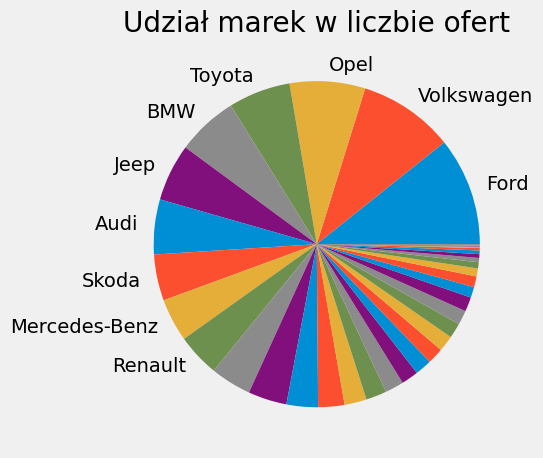

In [15]:
labels = [label if i < 10 else "" for i, label in enumerate(a.index)]

plt.pie(a['count'], labels=labels)
plt.title('Udział marek w liczbie ofert')
plt.tight_layout()
plt.show()

notatka

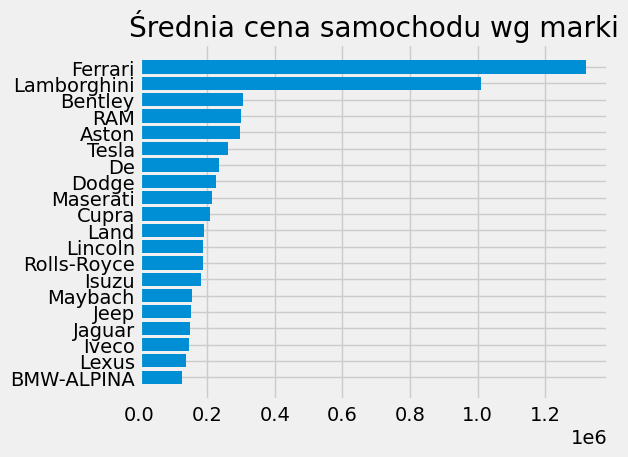

In [16]:
a = a.sort_values('mean').tail(20)
plt.barh(a.index, a["mean"])
plt.title('Średnia cena samochodu wg marki')
plt.tight_layout()
plt.show()

notatka

# Model

notatka

## Budowa transformatora i predyktora

notatka

notatka

https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.dummy import DummyRegressor

pipeline

In [18]:
from sklearn.pipeline import Pipeline

notatka

## Przygotowanie do treningu

notatka

In [19]:
from sklearn.model_selection import train_test_split

notatka

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export_text, plot_tree
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, VotingRegressor

notatka

## Fine Tuning

notatka

In [21]:
from sklearn.model_selection import GridSearchCV

notatka

## Ocena modelu

In [22]:
from sklearn.metrics import mean_squared_error

# Podsumowanie

# Bibliografia